<a href="https://www.kaggle.com/code/tmishinev/mallcustomerdata-eda-cluster-analysis?scriptVersionId=103867543" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Mall Customer Segmentation Data

<font size = 3.5> You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.</font>

<b><font size = 3.5>Problem Statement: </font></b>
<font size = 3.5>You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly. </font>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

df = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.drop(columns = ['CustomerID'], inplace = True)

## 1. Exploratory Data Analysis

In [2]:
#display dataset
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [3]:
# check for missing values
print(df.isna().sum())
print(df.shape)

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
(200, 4)


## 1.1 Feature Distibution

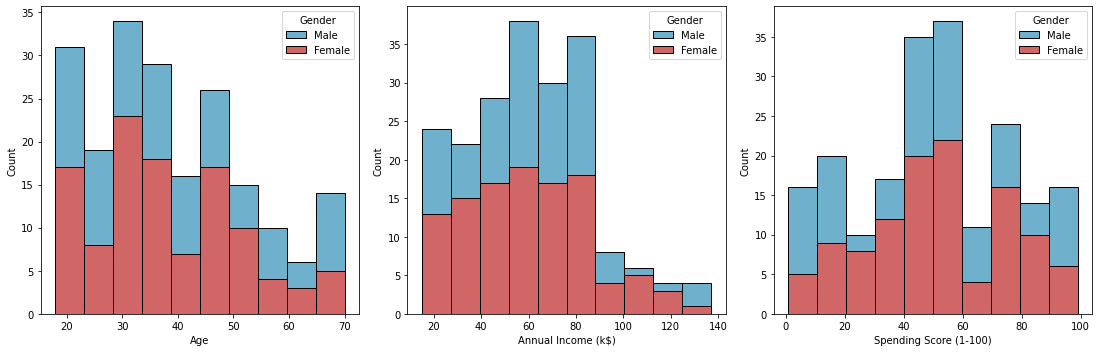

In [4]:
plt.figure(figsize = (20,5), tight_layout = True)

for i, feature in enumerate(df.columns):
    if feature!= 'Gender' : 
        plt.subplot(1,4,i+1)
        sns.histplot(data = df, x =feature, palette = ['#107dac', '#b30000'],alpha = 0.6,hue_order=['Male','Female'], hue = 'Gender', multiple = 'stack', bins = 10)


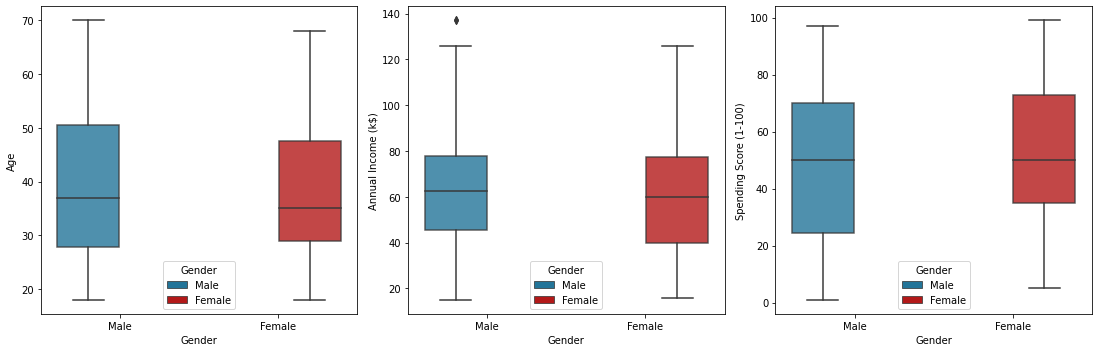

In [5]:
plt.figure(figsize = (20,5), tight_layout = True)

for i, feature in enumerate(df.columns):
    if feature!= 'Gender' : 
        plt.subplot(1,4,i+1)
        sns.boxplot(data = df, x ='Gender', y = feature, palette = ['#107dac', '#cc0000'],hue_order=['Male','Female'], hue = 'Gender',boxprops=dict(alpha=.8))


## 1.2 Feature Interaction

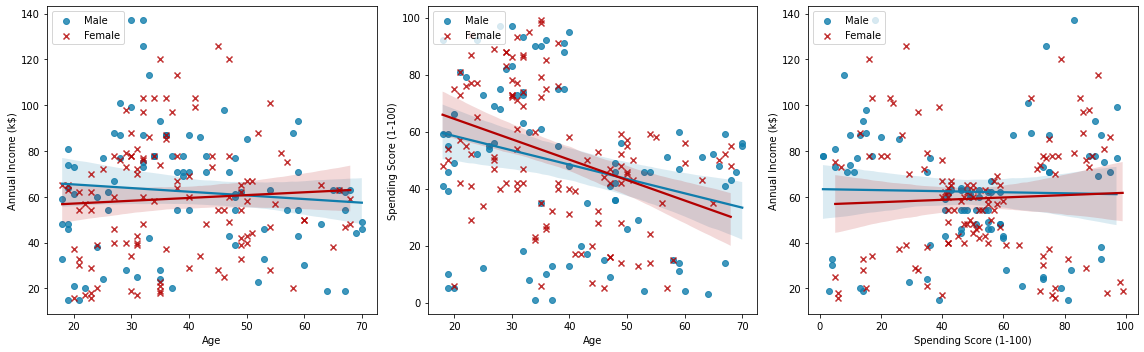

In [6]:
fig, axes = plt.subplots(1,3, figsize = (16,5), tight_layout = True)
sns.regplot(data =df[df['Gender'] == 'Male'], x = 'Age', y = 'Annual Income (k$)', label = 'Male', color = '#107dac', ax = axes[0], scatter_kws={'alpha':0.8})
sns.regplot(data =df[df['Gender'] == 'Female'], x = 'Age', y = 'Annual Income (k$)',label = 'Female',color = '#b30000', ax = axes[0], scatter_kws={'alpha':0.8}, marker = 'x')
axes[0].legend(loc = 2)

sns.regplot(data =df[df['Gender'] == 'Male'], x = 'Age', y = 'Spending Score (1-100)', label = 'Male',color = '#107dac', ax = axes[1], scatter_kws={'alpha':0.8})
sns.regplot(data =df[df['Gender'] == 'Female'], x = 'Age', y = 'Spending Score (1-100)',label = 'Female',color = '#b30000', ax = axes[1], scatter_kws={'alpha':0.8}, marker = 'x')
axes[1].legend(loc = 2)

sns.regplot(data =df[df['Gender'] == 'Male'], x = 'Spending Score (1-100)', y = 'Annual Income (k$)', label = 'Male',  color = '#107dac',  ax = axes[2], scatter_kws={'alpha':0.8})
sns.regplot(data =df[df['Gender'] == 'Female'], x = 'Spending Score (1-100)', y = 'Annual Income (k$)', label = 'Female',color = '#b30000',   ax = axes[2],scatter_kws={'alpha':0.8}, marker = 'x')
axes[2].legend(loc = 2)

## 2. Clustering the Data

## 2.1 Preprocessing Pipeline

In [7]:
X = df.copy()

#map gender to 0 and 1
dict_gender = {'Male':0, 'Female':1}
X['Gender'] = X['Gender'].map(dict_gender)

pipe_proc = Pipeline( [('scl', StandardScaler()), ('pca', PCA())])

X_pca = pipe_proc.fit_transform(X)

Text(0.5, 0, 'PCA Components')

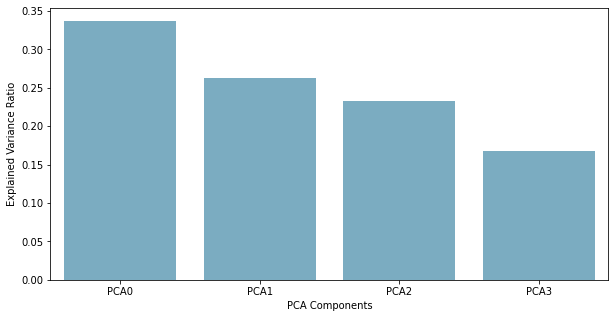

In [8]:
plt.figure(figsize = (10,5))
sns.barplot(x = ['PCA0', 'PCA1', 'PCA2', 'PCA3'], y = pipe_proc[1].explained_variance_ratio_,  color = '#107dac', alpha = 0.6)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('PCA Components')

## 2.2 KMeans Clustering

Text(0.5, 0, 'Number of Clusters')

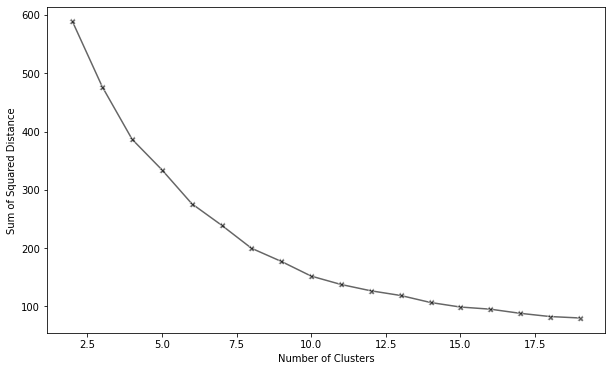

In [9]:
cluster_inertia = []
for i in range(2, 20):
    
    clst = KMeans(n_clusters = i)
    clst.fit(X_pca)
    cluster_inertia.append(clst.inertia_)

plt.figure(figsize = (10,6))
sns.lineplot(x = range(2, 20), y = cluster_inertia,marker='X', color = 'black', alpha = 0.6)
plt.ylabel('Sum of Squared Distance')
plt.xlabel('Number of Clusters')

<i><font size = 3.5>According to Elbow method we should aim around 8 to 10 clusters</font></i>

## 2.3 2d Visualization of the first 2 PCA components for 5 - 8 clusters

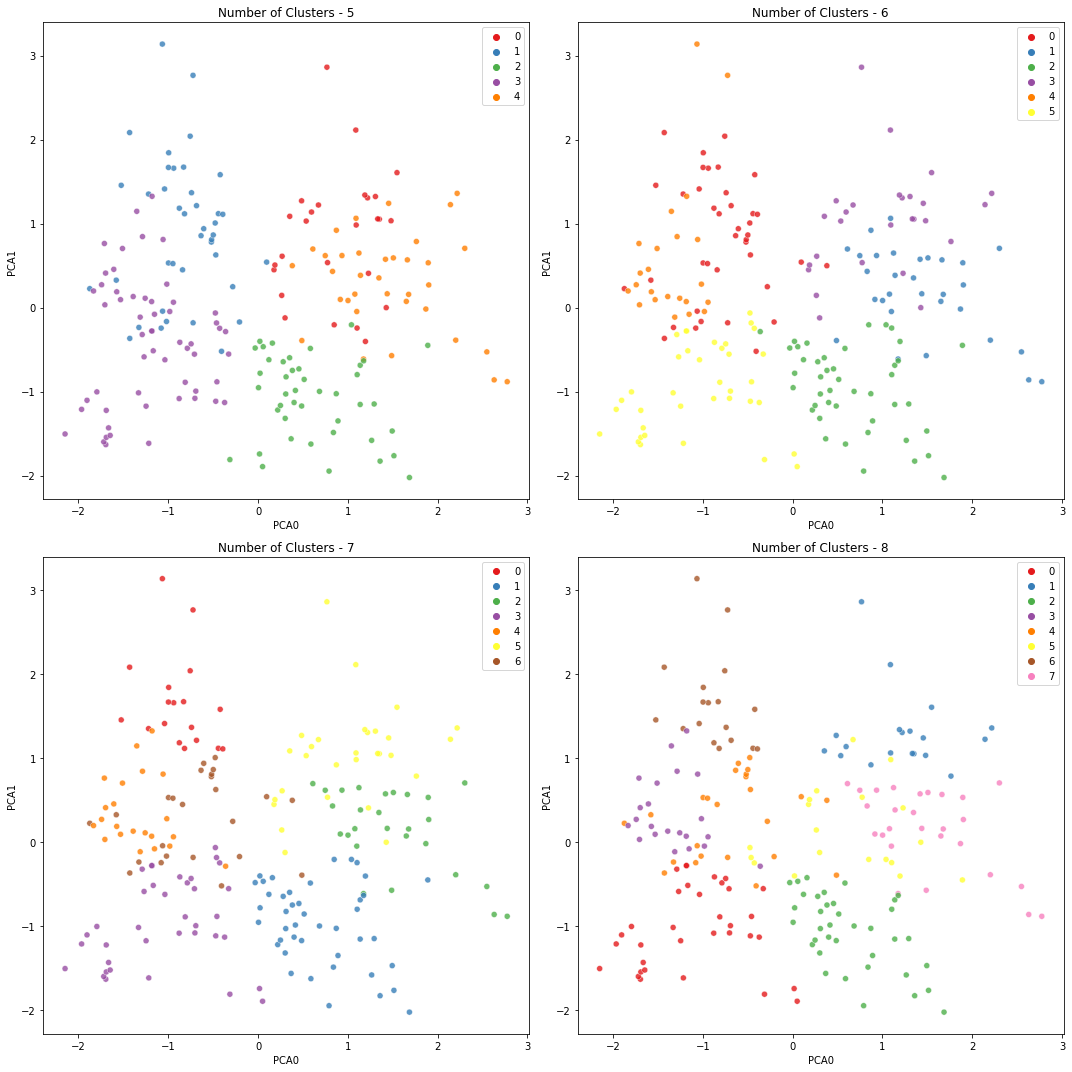

In [10]:
plt.figure(figsize = (15,15), tight_layout = True)
for i in range(5,9):
    plt.subplot(2,2,i-4)
    clst = KMeans(n_clusters = i)
    labels = clst.fit(X_pca).labels_
    X['label'] = labels

    sns.scatterplot( x = X_pca[:, 0], y = X_pca[:, 1], hue = labels, palette = 'Set1', alpha = 0.8)
    plt.ylabel('PCA1')
    plt.xlabel('PCA0')
    plt.title(f'Number of Clusters - {i}')

<i><font size = 3.5>2d visualization doesn't clearly reveal while we need so many clusters to separate the data</font></i>

## 2.4 Analyse results for N_clusters = 8 (3D Visualization of PCA 0,1,2)

In [11]:
#fit Kmeans for 8 clusters
clst = KMeans(n_clusters = 8)
labels = clst.fit(X_pca).labels_
X['labels'] = labels

import plotly.express as px
px.scatter_3d(x = X_pca[:, 0], y = X_pca[:, 1], z = X_pca[:, 2], color = labels, color_continuous_scale = 'balance')

<i><font size = 3.5>We can see that the clustering method created 2 planes with 4 well separated clusters. Lets return to the original features and see the mean values for each cluster</font></i>

In [12]:
#get mean feature values for each of the 8th clusters
cluster_mean = []
for label in np.unique(labels):
    df_temp = X.loc[X['labels'] == label]
    cluster_mean.append([label, df_temp['Gender'].count(), df_temp['Gender'].mean(), df_temp['Age'].mean(), df_temp['Annual Income (k$)'].mean(), df_temp['Spending Score (1-100)'].mean()])


df_mean_kmeans= pd.DataFrame(columns = df.columns.insert(0,'cluster').insert(1, 'num_samples'), data = cluster_mean)
df_mean_kmeans['Gender'] = df_mean_kmeans['Gender'].map({0:'Male', 1:'Female'})

#df_mean_kmeans.sort_values('Spending Score (1-100)', inplace = True)
df_mean_kmeans


,cluster,num_samples,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,34,Female,26.000000,39.529412,59.500000
1,1,36,Female,51.277778,46.722222,40.722222
2,2,18,Male,33.277778,87.111111,82.666667
3,3,22,Female,32.545455,85.272727,80.590909
4,4,19,Male,38.473684,85.894737,14.210526
5,5,20,Female,41.050000,86.700000,25.450000
6,6,26,Male,58.846154,48.692308,39.846154
7,7,25,Male,25.720000,40.400000,59.000000


<i><font size = 3.5>The clustering method created 4 clusters for each gender. Lets visualize the feature values for each cluster and look at the distribution</font></i>

## 2.5 Visualization of the feature values per cluster 

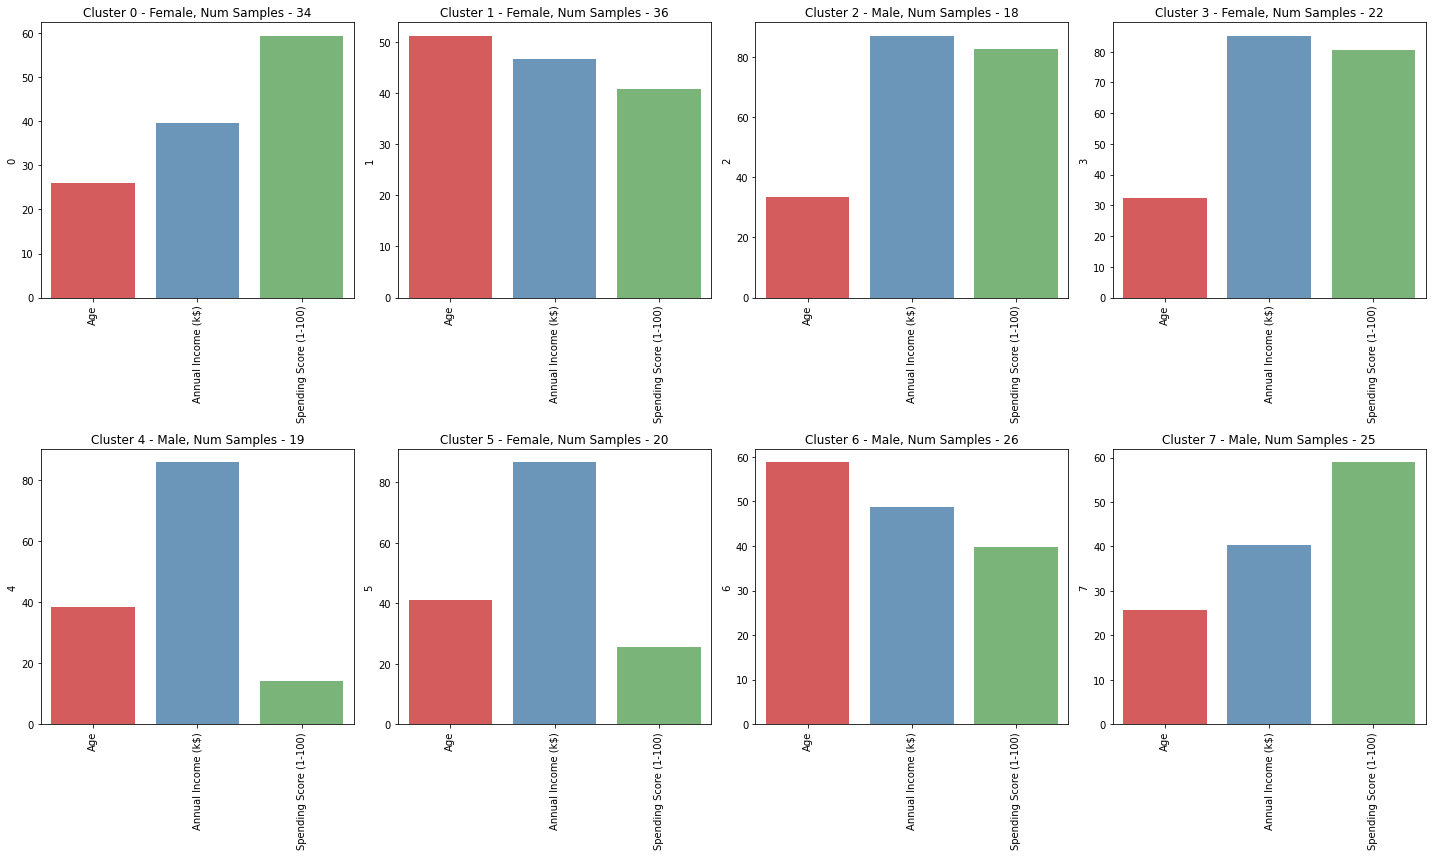

In [13]:
plt.figure(figsize = (20,12), tight_layout = True)

for i in df_mean_kmeans['cluster'].unique(): 
    plt.subplot(2,4,i+1)
    ax = sns.barplot(x = df_mean_kmeans.columns[3:], y = df_mean_kmeans.iloc[i, 3:], palette = 'Set1', alpha = 0.8)
    plt.xticks( rotation = 90)
    
    gender = df_mean_kmeans.loc[i, 'Gender']
    samples = df_mean_kmeans.loc[i, 'num_samples']
    plt.title(f'Cluster {i} - {gender}, Num Samples - {samples}')
    plt.ylim(ymin=0)


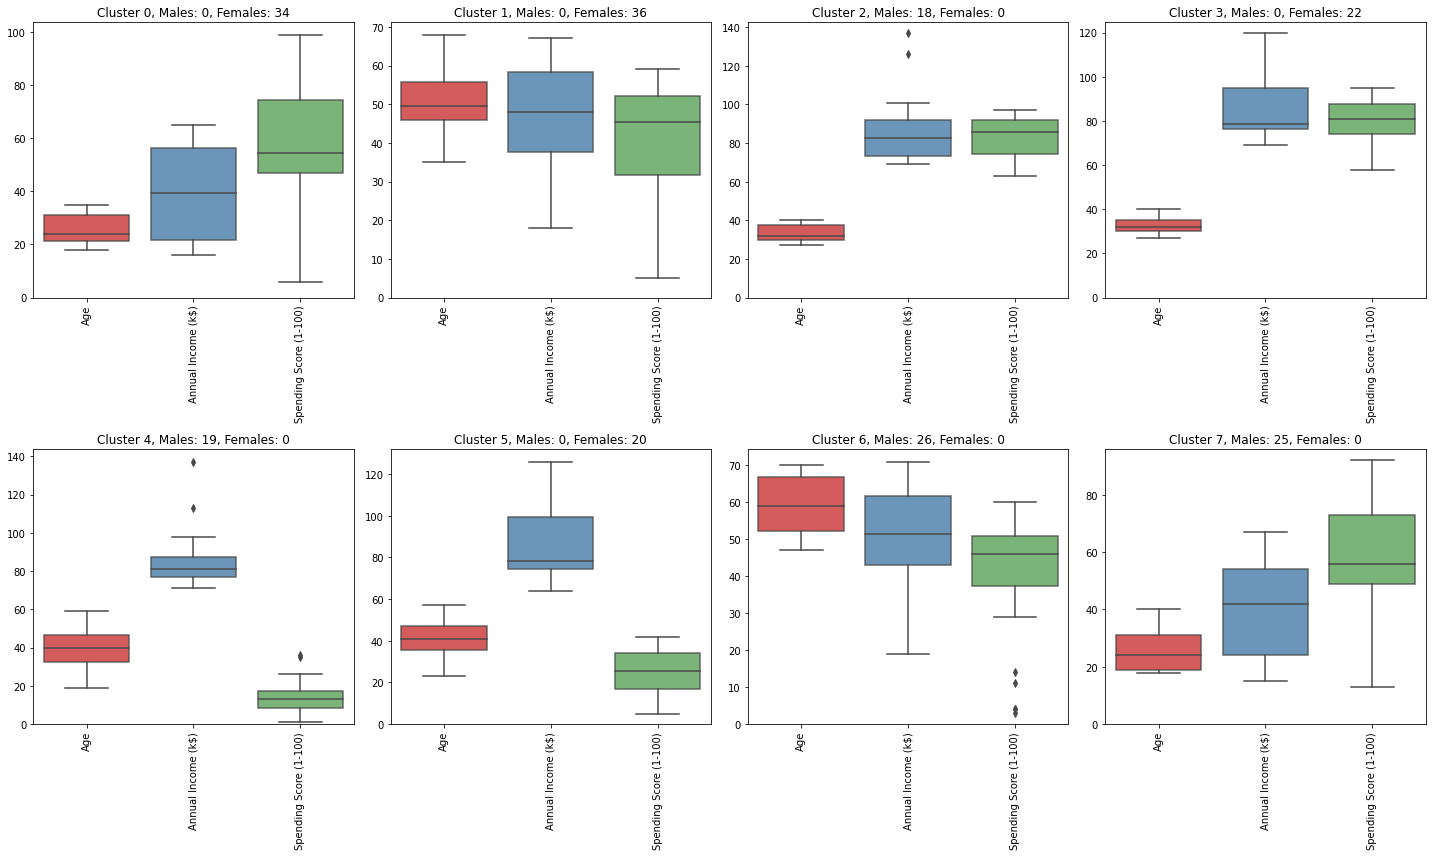

In [14]:
plt.figure(figsize = (20,12), tight_layout = True)

for i in X['labels'].unique(): 

    plt.subplot(2,4,i+1)
    sns.boxplot(data = X.loc[X['labels'] == i, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], palette = 'Set1', boxprops=dict(alpha=0.8))
    
    males = len(X.loc[(X['labels'] == i) & (X['Gender'] == 0)]['Gender'])
    females = len(X.loc[(X['labels'] == i)  &  (X['Gender'] == 1)]['Gender'])

    plt.xticks( rotation = 90)
    plt.title(f'Cluster {i}, Males: {males}, Females: {females}')
    plt.ylim(ymin=0)

## 3. Conclusion
#### - The four clusters with highes spending score are males and females with mid to high income between 25 and 35 years old
#### - Second according to spending are people above 50 years old with relatively hight income
#### - There are 2 groups with around 40 years old with very high income and very low spending scores